# Deep Learning Algoritmaları ile Fotoğraflardaki Nesneleri Tanıma ve Sınıflandırma Projesi

<IMG src="deep7.png" width="750" height="180">
    
    

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Datasetimizi (cifar10 verisetini) yüklüyoruz: (Yükleme işlemi için Internet bağlantınızın olması gerekiyor). Eğer bağlantınız yoksa  veri setini Internetten indirip de yükleyebilirsiniz..

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


170500096/170498071 [==============================] - 260s 2us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

#### Her bir fotoğraf 32 pixele-32 pixel kare boyutunda ve renkli 3 kanal RGB bilgileri olduğu için arrayımız bu şekilde..

<IMG src="cifar10_images.jpg" width="400" height="400">


In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

y_train ve y_test 2 boyutlu bir array olarak tutuluyor cifar10 verisetinde. 
Biz bu verileri görsel olarak daha rahat anlamak için tek boyutlu hale getiriyoruz.
2 boyutlu bir arrayi (sadece tekbir boyutunda veri var diğer boyutu boş olan tabi) tekboyutlu hale geitrmek için reshape() kullanıyoruz..

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
y_test 

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

#### Verilere bir göz atalım. bu amaçla kendimiz bir array oluşturuyoruz: 

In [8]:
resim_siniflari = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])        
    plt.xlabel(resim_siniflari[y[index]])
    plt.show()


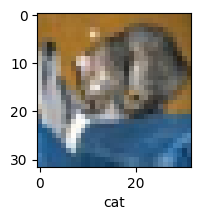

In [10]:
plot_sample(X_test, y_test, 0)

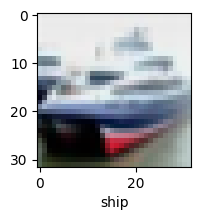

In [11]:
plot_sample(X_test, y_test, 1)

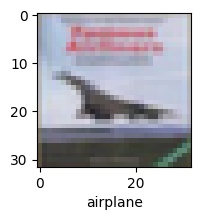

In [12]:
plot_sample(X_test, y_test, 3)

### Normalization

Verilerimizi normalize etmemiz gerekiyor. Aksi takdirde CNN algoritmaları yanlış sonuç verebiliyor. Fotoğraflar RGB olarak 3 kanal ve her bir pixel 0-255 arasında değer aldığı için normalization için basitçe her bir pixel değerini 255'e bölmemiz yeterli..

In [13]:
X_train = X_train / 255
X_test = X_test / 255

### Deep Learning Algoritmamızı CNN - Convolutional Neural Network Kullanarak Tasarlıyoruz:

In [14]:
deep_learning_model = models.Sequential([
    # İlk bölüm Convolution layer.. Bu kısımda fotoğraflardan tanımlama yapabilmek için özellikleri çıkarıyoruz...
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # İkinci bölüm klasik Articial Neural Network olan layerımız.. Yukarıdaki özelliklerimiz ve training bilgilerine
    # göre ANN modelimizi eğiteceğiz..
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
deep_learning_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Modelimizi eğitmeye başlayalım artık...

In [27]:
deep_learning_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7470 - accuracy: 0.7400
Epoch 2/20
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6986 - accuracy: 0.7552
Epoch 3/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6485 - accuracy: 0.7752
Epoch 4/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6118 - accuracy: 0.7874
Epoch 5/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.5710 - accuracy: 0.7993
Epoch 6/20
1563/1563 [==============================] - 52s 34ms/step - loss: 0.5381 - accuracy: 0.8115
Epoch 7/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.5037 - accuracy: 0.8224
Epoch 8/20
1563/1563 [==============================] - 63s 40ms/step - loss: 0.4704 - accuracy: 0.8334
Epoch 9/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.4421 - accuracy: 0.8429
Epoch 10/20
1563/1563 [==============================] - 50s 32m

In [17]:
deep_learning_model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9186 - accuracy: 0.6848


[0.9186462759971619, 0.6848000288009644]

In [18]:
y_pred = deep_learning_model.predict(X_test)
y_pred[:3]

array([[8.43122078e-04, 5.06245589e-04, 2.35472317e-03, 6.87438667e-01,
        4.85885917e-04, 1.52946532e-01, 1.50773197e-01, 3.09612573e-04,
        3.75602487e-03, 5.85964532e-04],
       [1.91642214e-02, 6.87705815e-01, 1.05740095e-04, 7.86432065e-06,
        5.89096817e-06, 2.92928598e-06, 2.96178797e-07, 9.70871315e-06,
        2.75624990e-01, 1.73725765e-02],
       [6.17310554e-02, 1.86853677e-01, 2.95937969e-03, 5.55376103e-03,
        7.84747861e-03, 2.10557785e-03, 5.78193809e-04, 7.52044981e-03,
        6.95454657e-01, 2.93957479e-02]], dtype=float32)

In [19]:
y_predictions_siniflari = [np.argmax(element) for element in y_pred]
y_predictions_siniflari[:3]

[3, 1, 8]

In [20]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

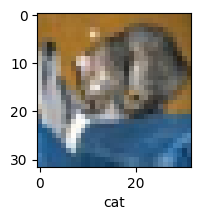

In [21]:
plot_sample(X_test, y_test,0)

In [22]:
resim_siniflari[y_predictions_siniflari[0]]

'cat'

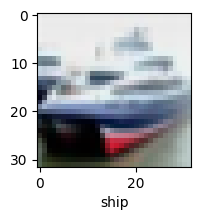

In [23]:
plot_sample(X_test, y_test,1)

In [24]:
resim_siniflari[y_predictions_siniflari[1]]

'automobile'

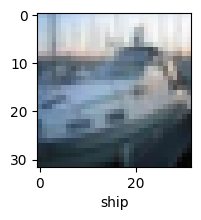

In [25]:
plot_sample(X_test, y_test,2)

In [26]:
resim_siniflari[y_predictions_siniflari[2]]

'ship'